In [1]:
import cpi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cpi_items_df = pd.read_csv('cpi_data.csv', skiprows=11)
cpi_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 277 non-null    int64  
 1   Month                277 non-null    int64  
 2   Label                277 non-null    object 
 3   Observation Value    277 non-null    float64
 4   Gas Prices           277 non-null    float64
 5   Inflation Rate       277 non-null    float64
 6   PPI                  277 non-null    float64
 7   Median Housing Cost  277 non-null    float64
 8   PCE                  277 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 19.6+ KB


In [3]:
cpi_items_df.describe()

,Year,Month,Observation Value,Gas Prices,Inflation Rate,PPI,Median Housing Cost,PCE
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2011.043321,6.480144,223.304271,2.655072,2.250542,182.636253,283870.253105,97.530487
std,6.672320,3.467834,31.677077,0.791564,1.052417,32.516261,41392.754863,12.023087
min,2000.000000,1.000000,169.300000,1.200000,0.600000,128.100000,224851.360000,77.180000
25%,2005.000000,3.000000,198.100000,2.072000,1.700000,162.200000,250827.780000,87.938000
50%,2011.000000,6.000000,225.395000,2.631000,2.100000,187.700000,277006.500000,98.353000
75%,2017.000000,9.000000,244.006000,3.245000,2.400000,201.600000,310958.540000,105.714000
max,2023.000000,12.000000,300.536000,5.149000,6.600000,280.251000,398191.480000,125.858000


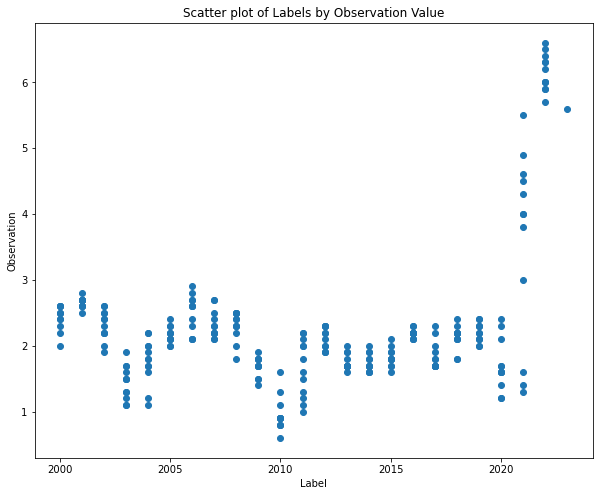

In [4]:
#cpi_items_df.sort_values(by=['year'])
cpi_items_df
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cpi_items_df['Year'], cpi_items_df['Inflation Rate'])
ax.set_xlabel('Label')
ax.set_ylabel('Observation')
ax.set_title('Scatter plot of Labels by Observation Value')
plt.show()

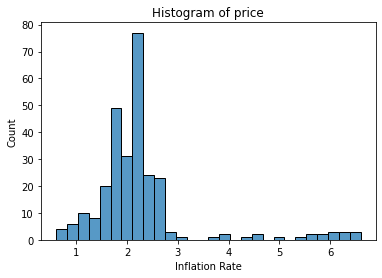

In [5]:
sns.histplot(x=cpi_items_df['Inflation Rate'])
plt.title('Histogram of price')
plt.show()

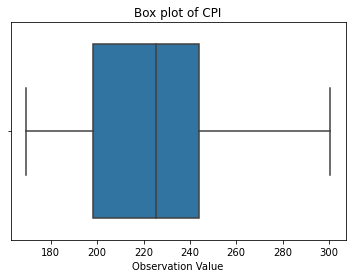

In [6]:
sns.boxplot(x=cpi_items_df['Observation Value'])
plt.title('Box plot of CPI')
plt.show()

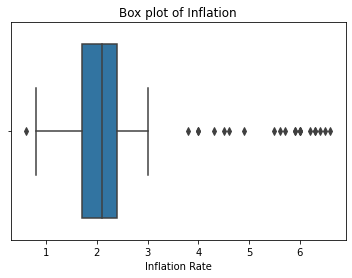

In [7]:
sns.boxplot(x=cpi_items_df['Inflation Rate'])
plt.title('Box plot of Inflation')
plt.show()

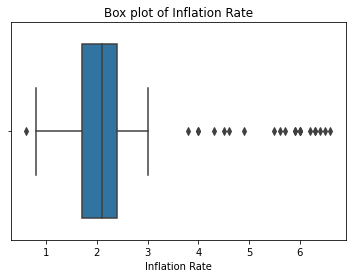

In [8]:
sns.boxplot(x=cpi_items_df['Inflation Rate'])
plt.title('Box plot of Inflation Rate')
plt.show()

In [9]:
# cpi_items_df.head()
# # Accessing data from WBGAPI
# indicator = 'SP.POP.TOTL'
# country = 'USA'
# start_date = '2010'
# end_date = '2021'
# #wb = wbgapi.get_series(indicator=indicator, country=country, start=start_date, end=end_date)

# # Converting DataframeObject to Pandas DataFrame
# wb_data = wb.data.DataFrame(wb.region.members('USA'))
X = cpi_items_df[['Observation Value', 'PPI', 'PCE', 'Gas Prices', 'Median Housing Cost']].values
Y = cpi_items_df['Inflation Rate'].values
reg = LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)
coefficients = reg.coef_
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print('Coefficients:', coefficients)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print(reg)

Coefficients: [ 5.54039473e-01  6.14606361e-02 -1.56177954e+00 -8.38255873e-01
  9.73914401e-06]
Mean Squared Error: 0.2511567281180724
R-squared: 0.7724169478325636
LinearRegression()


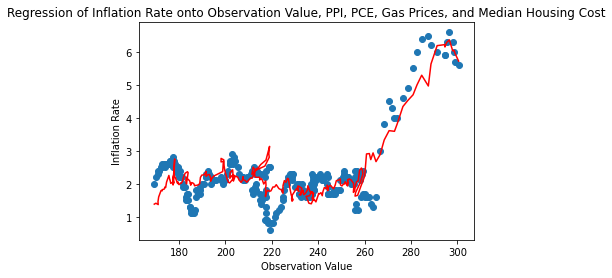

In [10]:
plt.scatter(X[:, 0], Y)

# Add the regression line
plt.plot(X[:, 0], Y_pred, color='red')

# Add labels and title
plt.xlabel('Observation Value')
plt.ylabel('Inflation Rate')
plt.title('Regression of Inflation Rate onto Observation Value, PPI, PCE, Gas Prices, and Median Housing Cost')

# Display the plot
plt.show()

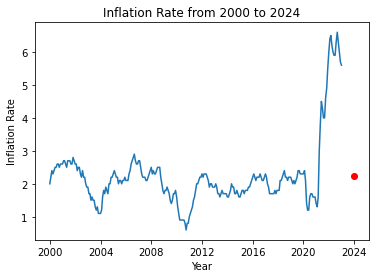

Correlation matrix is : 
                         Year     Month  Observation Value  Gas Prices  \
Year                 1.000000 -0.010297           0.983945    0.563405   
Month               -0.010297  1.000000           0.038719    0.032554   
Observation Value    0.983945  0.038719           1.000000    0.648907   
Gas Prices           0.563405  0.032554           0.648907    1.000000   
Inflation Rate       0.313501  0.024797           0.435712    0.354403   
PPI                  0.886744  0.032499           0.942464    0.848241   
Median Housing Cost  0.511523  0.043210           0.561416    0.205234   
PCE                  0.987235  0.036273           0.999661    0.645987   

                     Inflation Rate       PPI  Median Housing Cost       PCE  
Year                       0.313501  0.886744             0.511523  0.987235  
Month                      0.024797  0.032499             0.043210  0.036273  
Observation Value          0.435712  0.942464             0.561416  0.9

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = cpi_items_df[['Observation Value', 'PPI', 'PCE', 'Gas Prices', 'Median Housing Cost']].values
Y = cpi_items_df['Inflation Rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Calculate average values for 2000-2023
cpi_2024 = cpi_items_df.loc[cpi_items_df['Year'] >= 2000, 'Observation Value'].mean()
ppi_2024 = cpi_items_df.loc[cpi_items_df['Year'] >= 2000, 'PPI'].mean()
pce_2024 = cpi_items_df.loc[cpi_items_df['Year'] >= 2000, 'PCE'].mean()
gas_prices_2024 = cpi_items_df.loc[cpi_items_df['Year'] >= 2000, 'Gas Prices'].mean()
housing_2024 = cpi_items_df.loc[cpi_items_df['Year'] >= 2000, 'Median Housing Cost'].mean()

# Make predictions
X_2024 = [[cpi_2024, ppi_2024, pce_2024, gas_prices_2024, housing_2024]]
y_2024_predicted = regressor.predict(X_2024)

# Evaluate the model
from sklearn.metrics import r2_score


# Create x-axis values for each month of each year
import datetime as dt

# Visualize the inflation rate over time
years = cpi_items_df['Year'].tolist()
months = cpi_items_df['Month'].tolist()
x = [dt.datetime(year, month, 1) for year, month in zip(years, months)]

inflation_rates = cpi_items_df['Inflation Rate'].tolist()


plt.plot(x, inflation_rates)
plt.scatter(dt.datetime(2024, 1, 1), y_2024_predicted, color='red', marker='o')
plt.title('Inflation Rate from 2000 to 2024')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.show()

# form correlation matrix
matrix = cpi_items_df.corr()
print("Correlation matrix is : ")
print(matrix)
print()

coefficients = regressor.coef_
y_test_predicted = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Predicted Value:', y_2024_predicted)